# 토픽모델링 (LDA)
- 빅카인즈 뉴스기사 데이터 활용(https://www.bigkinds.or.kr/)

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/swkim01/DSAC3/blob/main/gg-56-토픽모델링.ipynb"><img src="https://github.com/swkim01/DSAC3/raw/main/colab_logo_32px.png" />구글 코랩에서 실행</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/swkim01/DSAC3/blob/main/gg-56-토픽모델링.ipynb"><img src="https://github.com/swkim01/DSAC3/raw/main/GitHub-Mark-32px.png" />깃헙에서 소스 보기</a>
  </td>
</table>

In [1]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 86 kB 5.5 MB/s 
     |████████████████████████████████| 448 kB 51.1 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [2]:
import konlpy
import numpy as np
import pandas as pd
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from konlpy.tag import Twitter

In [3]:
!wget https://bit.ly/2QA9xhg -O news_1500.xlsx

--2021-11-28 07:32:43--  https://bit.ly/2QA9xhg
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.dropbox.com/s/yj1gxuy0hkjwjpu/news_1500.xlsx [following]
--2021-11-28 07:32:44--  https://www.dropbox.com/s/yj1gxuy0hkjwjpu/news_1500.xlsx
Resolving www.dropbox.com (www.dropbox.com)... 162.125.7.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.7.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/yj1gxuy0hkjwjpu/news_1500.xlsx [following]
--2021-11-28 07:32:44--  https://www.dropbox.com/s/raw/yj1gxuy0hkjwjpu/news_1500.xlsx
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc004e7cbeaf7b878548a507c1f.dl.dropboxusercontent.com/cd/0/inline/Ba39oZI4-3yn5k6Em4U9-9SJV18nixZa7lQhg4E44t43

In [4]:
#df_train = pd.read_excel('news_1500.xlsx', names=['기사'], delimiter='\t', keep_default_na=False)
df_train = pd.read_excel('news_1500.xlsx', names=['기사'], keep_default_na=False)

#Countvectorizer적용을 위해 list로 변환
list_train = df_train['기사'].tolist()

In [5]:
len(list_train)

1499

In [6]:
list_train[:5]

['호주 브리즈번에서 발생한 한국인 워킹홀리데이 참가자 살해범이 같은 한국인 것으로 드라나 충격을 주고 있다. \n \n20일 호주 국영 ABC방송은 퀸즐랜드주 경찰이 김모(28)씨를 살해하고 암매장한 혐의로\xa0한국인 홍모(28)씨를\xa0체포했다고 보도했다. \n \n경찰에 따르면 홍씨는\xa0지난 16일 오후 브리즈번 캐넌힐에서 1만 5000 호주달러를 원화로 환전해줄 사..',
 '호주 경찰이 한국인 워킹홀리데이 참가자를 살해한 혐의로 또 다른 한국인 남성을 기소했다고 호주 언론이 보도했다. \n \n퀸즐랜드주 경찰은 20일(현지시간) 금품을 빼앗기 위해 김민태(28)씨를 살해한 혐의로 황모(28)씨를 기소했다고 시드니모닝헤럴드가 보도했다. \n \n그는 이날 브리즈번 법원에서 열린 심리에 출석해 기자들로부터 고개를 돌린 채 아래쪽만 쳐..',
 '\xa0 \n \n호주 괴물 가재가 공개돼 네티즌들의 폭발적인 관심을 끌고 있다. \n \n최근 각종 온라인 커뮤니티 게시판에는 ‘호주 괴물 가재’라는 제목의 사진 한 장이 게재됐다. \n \n공개된 사진에는 웬만한 성인 남성 팔 크기와 비슷한 가재의 모습이 담겨 있다. 사진 속 남성도 가재가 무거운지 엉거주춤한 자세를 취하고 있다. 호주에서 잡힌 것으로 알려진 가재의..',
 '최근 인기를 끌고 있는 tvN의 드라마 ‘응답하라 1994’가 같은 장면을 내보내고 다른 프로그램의 화면이 나오는 등 방송사고를 냈다. \n▶ 방송사고 이후 사과 자막이 나오는 tvN ‘응답하라 1994’의 한 장면.20일 밤 10시쯤 드라마 ‘응답하라 1994’가 방송되는 도중에 방송사고가 발생했다. 이날 방송에서 성나정이 호주로 떠났다가 한국으로 돌아..',
 '호주 워킹홀리데이 한국인 참가자가 19일 또다시 숨진 채 발견됐다. 지난달 호주에서 한국인 여대생이 무참히 살해된 지 한 달도 지나지 않아 발생한 이번 사건으로 호주 교민사회 및 어학연수 희망자들의 불안감이 커지고 있다. \n \n호주 ABC방송 등에 따르면 퀸즐랜드주 

In [7]:
twitter = Twitter()
results = []
for line in list_train:
    word_list = twitter.pos(line, norm=True, stem=True)
    words = []
    for word in word_list:
        if not word[1] in ["Josa", "eomi", "Punctuation", "Verb"]:
            words.append(word[0])
    words = (" ".join(words)).strip()
    results.append(words)

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [8]:
vect = CountVectorizer(max_features=10000, max_df=.10)
X = vect.fit_transform(results)

lda = LatentDirichletAllocation(n_components=10, learning_method="batch",
                                max_iter=25, random_state=0)

document_topics = lda.fit_transform(X)

In [9]:
lda.components_.shape

(10, 10000)

In [10]:
# 토픽마다(components_의 행) 특성을 오름차순으로 정렬합니다
# 내림차순이 되도록 [:, ::-1] 사용해 행의 정렬을 반대로 바꿉니다
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]

# CountVectorizer 객체에서 특성 이름을 구합니다.
feature_names = np.array(vect.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [11]:
# 10개의 토픽을 출력합니다
%matplotlib inline
import matplotlib.pyplot as plt

def print_topics(topics, feature_names, sorting, topics_per_chunk=6, n_words=20):
    for i in range(0, len(topics), topics_per_chunk):
        # for each chunk:
        these_topics = topics[i: i + topics_per_chunk]
        # maybe we have less than topics_per_chunk left
        len_this_chunk = len(these_topics)
        # print topic headers
        print(("topic {:<8}" * len_this_chunk).format(*these_topics))
        print(("-------- {0:<5}" * len_this_chunk).format(""))
        # print top n_words frequent words
        for i in range(n_words):
            try:
                print(("{:<14}" * len_this_chunk).format(
                    *feature_names[sorting[these_topics, i]]))
            except:
                pass
        print("\n")
        
print_topics(topics=range(10), feature_names=feature_names, sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
박태환           보도            국제            리그            올림픽           
올림픽           필리핀           사드            포켓몬           경기            
수영            지역            발표            축구            대표팀           
출전            통해            개최            acl           예선            
리우            결과            내년            감독            대회            
국가대표          정부            독도            게임            시드니           
27            같다            평화            시즌            오후            
정부            발견            위성            해밍턴           2016          
선수            조사            소녀            지난해           출전            
대학            방송            기업            전북            리우            


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
축구  

In [12]:
# 100개 토픽 학습
lda100 = LatentDirichletAllocation(n_components=100, learning_method="batch",
                                   max_iter=25, random_state=0)
document_topics100 = lda100.fit_transform(X)

In [13]:
topics = np.array([7, 16, 24, 41, 45, 51, 54, 81, 89, 97])

In [14]:
sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())
print_topics(topics=topics, feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=10)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


topic 7       topic 16      topic 24      topic 41      topic 45      
--------      --------      --------      --------      --------      
엘니뇨           위해            사이트           태풍            리그            
피해자           남중국해          경쟁            이름            전북            
옥스팜           보도            이행            의미            축구            
보고서           페이스북          도박            손흥민           연맹            
2013          커플            수준            독일            acl           
트러블메이커        인도            포트            지역            챔피언스리그        
노예            합동            발표            매장            클래식           
wff           순찰            국가            물이            현대            
가장            이케아           등급            게시            서울            
항공            방송            서울대           말레이시아         시즌            


topic 51      topic 54      topic 81      topic 89      topic 97      
--------      --------      --------      --------      --------      
브라질 

In [17]:
# 골프 관련 토픽 86를 가중치로 정렬합니다
golf = np.argsort(document_topics100[:, 86])[::-1]
# 이 토픽이 가장 비중이 큰 문서 다섯개를 출력합니다
for i in golf[:5]:
    # 첫 5 문장을 출력합니다
    print(list_train[i], "\n")

기권을 선언한 박인비 선수. 사진=SBS '힐링캠프' 방송화면 캡처‘골프 여제’ 박인비(28 KB금융그룹)가 미국여자프로골프(LPGA) 투어 2016시즌 개막전에서 허리 부상 때문에 경기를 포기하고 결국 기권을 선언해 이목이 집중됐다. 
 
박인비는 29일(한국시간) 바하마 파라다이스의 오션 클럽 골프코스(파73 6천625야드)에서 열린 바하마 클래식(.. 

34개 대회에 총상금 6735만달러(약 794억원)가 걸려 있는 2017 미국여자프로골프(LPGA)투어가 27일 퓨어 실크 바하마 LPGA 클래식(총상금 140만달러)을 시작으로 11개월간의 대장정에 돌입한다. 
 
카리브해 바하마의 파라다이스 아일랜드 오션클럽 골프코스(파73 6625야드)에서 열리는 퓨어 실크 바하마 LPGA 클래식은 시즌 개막전으로.. 

한국 남자 골프의 희망 김시우(22 CJ대한쇼핑 사진)가 2017년 새해 첫 대회에서 세계 최고수들과 샷 대결을 펼친다. 
 
지난해 8월 미국프로골프(PGA)투어 윈덤챔피언십 우승자인 김시우는 5일 밤(한국시간)부터 나흘 동안 미국 하와이의 카팔루아 리조트의 플랜테이션 골프코스(파73 7452야드)에서 열리는 PGA투어 SBS 토너먼트 오브 챔피언스(.. 

또 한 번의 매머드급 국제행사가 이달 중순 한국에서 열린다. 
 
사이버 정책에 영향을 미치는 정부 각료와 전문가, 국제기구 등 국내외에서 1000명 이상의 인사가 참여하는 ‘제3차 세계 사이버스페이스 총회’다. 17일부터 이틀간 서울 코엑스에서 개최된다. 사이버 이슈를 다루는 단일 국제회의로는 역대 최대규모다. 
 
국제금융(2010년 서울 G20 정.. 

박인비. 사진제공=KB금융그룹미국여자프로골프(LPGA)투어에서 ‘한국인 첫 올해의 선수’에 이어 2년 연속 상금왕에 오른 박인비(25 KB금융그룹)는 “세계랭킹 1위에 올해의 선수상을 받았지만 상금왕까지는 욕심내지 않았다”며 기쁨을 드러냈다. 박인비는 “올해 목표는 마지막 대회까지 세계랭킹 1위 자리를 지키는 것이었는 데 세가지를 다 

In [1]:
#한글 설치
#!apt-get install fonts-nanum*
#!apt-get install fontconfig
#!fc-cache -fv
#!cp /usr/share/fonts/truetype/nanum/Nanum* /usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/
#!rm -rf /content/.cache/matplotlib/*
##import matplotlib
##matplotlib.font_manager._rebuild()
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 3s (3,048 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and d

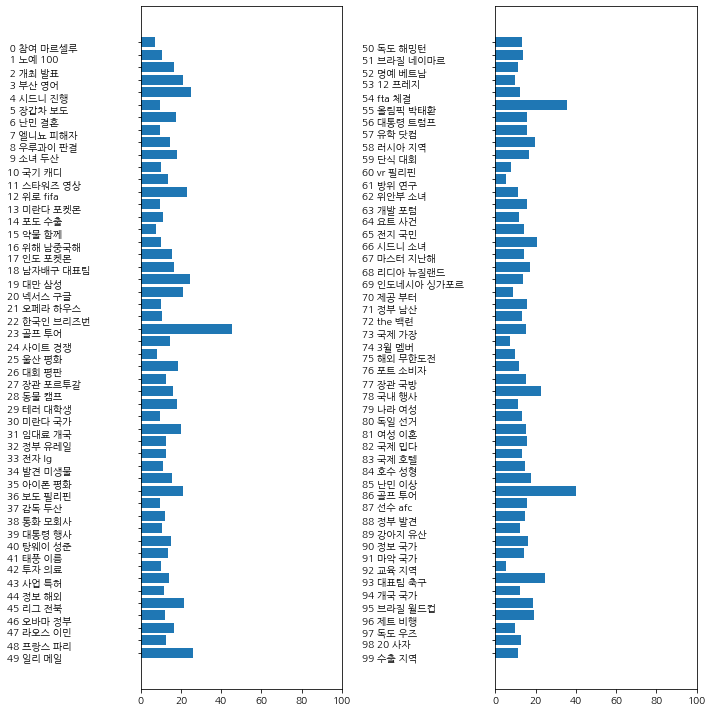

In [18]:
import platform
from matplotlib import font_manager, rc

import matplotlib.pyplot as plt
import matplotlib

# '-' 기호 보이게 하기
matplotlib.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Windows':
    path = "c:\Windows\Fonts\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
# 맥
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
# 리눅스
elif platform.system() == 'Linux':
    rc('font', family='NanumGothic')
else:
    print('system error...')

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ["{:>2} ".format(i) + " ".join(words)
               for i, words in enumerate(feature_names[sorting[:, :2]])]

# 두 개의 열이 있는 막대 그래프
for col in [0, 1]:
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 100)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()